### Biblioteki

In [32]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Zadanie wprowadzające

Zbiór danych składa się z 500 punktów, liczba cech = 1, rozrzut danych jest na poziomie
10, random_state = 101).

In [33]:
X, y = make_regression(n_samples=100, n_features=1, noise=10)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape (po standaryzacji):", X_scaled.shape)

X shape (po standaryzacji): (100, 1)


### Należy przygotować wykres punktowy X i y.

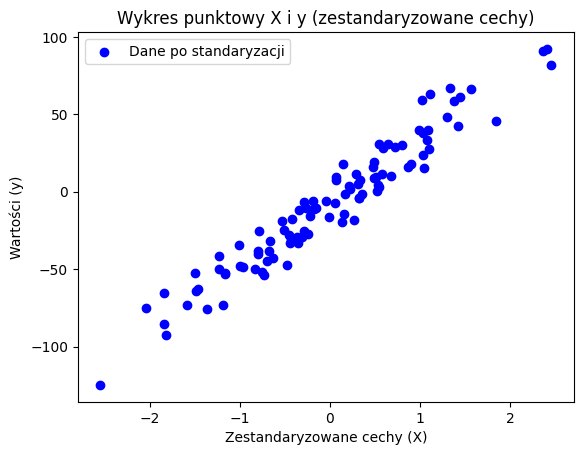

In [34]:
plt.scatter(X_scaled, y, color='blue', label='Dane po standaryzacji')
plt.title("Wykres punktowy X i y (zestandaryzowane cechy)")
plt.xlabel("Zestandaryzowane cechy (X)")
plt.ylabel("Wartości (y)")
plt.legend()
plt.show()


Macierz cech należy zestandaryzować.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80,)
y_test shape: (20,)


Następnie należy stworzyć model regresji liniowej.

In [36]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Współczynnik regresji (nachylenie):", model.coef_)
print("Przesunięcie (intercept):", model.intercept_)

Współczynnik regresji (nachylenie): [40.1586944]
Przesunięcie (intercept): -7.902582103651208


Sprawdzić predykcję modelu do zbioru treningowego, a następnie narysować wykres
punktowy X_train vs y_train wraz z krzywą regresji.

In [37]:
y_train_pred = model.predict(X_train)

print("Prawdziwe wartości y_train:", y_train[:5])
print("Przewidywane wartości y_train_pred:", y_train_pred[:5])

Prawdziwe wartości y_train: [-52.14200465  15.97679539 -27.55141788 -62.70819381 -17.61572434]
Przewidywane wartości y_train_pred: [-54.65701368  26.71090422 -17.63641261 -66.8080614  -24.69201528]


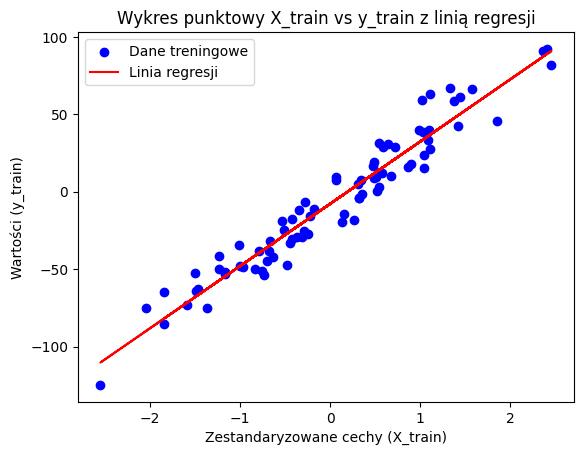

In [38]:
plt.scatter(X_train, y_train, color='blue', label='Dane treningowe')

plt.plot(X_train, y_train_pred, color='red', label='Linia regresji')

plt.title("Wykres punktowy X_train vs y_train z linią regresji")
plt.xlabel("Zestandaryzowane cechy (X_train)")
plt.ylabel("Wartości (y_train)")

plt.legend()

plt.show()

Jakie są przewidywane wartości dla danych ze zbioru testowego? Należy narysować wykres
punktowy X_test vs y_test wraz z krzywą regresji.

In [39]:
y_test_pred = model.predict(X_test)

print("Prawdziwe wartości y_test:", y_test[:5])
print("Przewidywane wartości y_test_pred:", y_test_pred[:5])

Prawdziwe wartości y_test: [ 48.14159888 -16.20106234  -5.9175392  -92.43251567 -25.02154786]
Przewidywane wartości y_test_pred: [ 44.31937802  -8.5058426  -15.37969394 -81.08701381 -39.66486895]


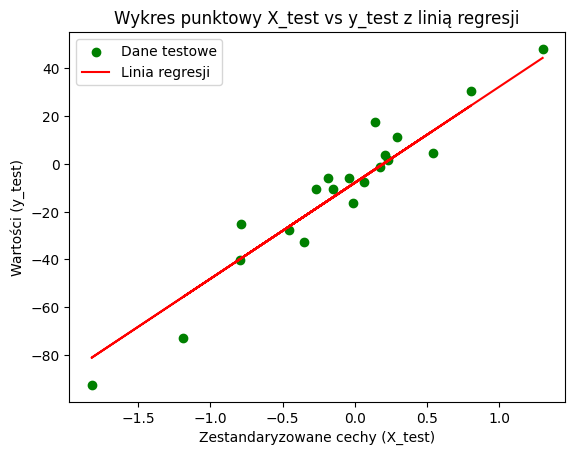

In [40]:
plt.scatter(X_test, y_test, color='green', label='Dane testowe')

plt.plot(X_test, y_test_pred, color='red', label='Linia regresji')

plt.title("Wykres punktowy X_test vs y_test z linią regresji")
plt.xlabel("Zestandaryzowane cechy (X_test)")
plt.ylabel("Wartości (y_test)")

plt.legend()

plt.show()

Należy przygotować wykres wartości resztowych dla zbioru treningowego i testowego (na
osi x znajdują się wartości etykiet (y_train/y_test, a na osi y znajduję się różnica
y_pred_train – y_train,/y_pred_test – y_test). Czy dla większości wartości występują błędy
większe/mniejsze?

In [41]:
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test

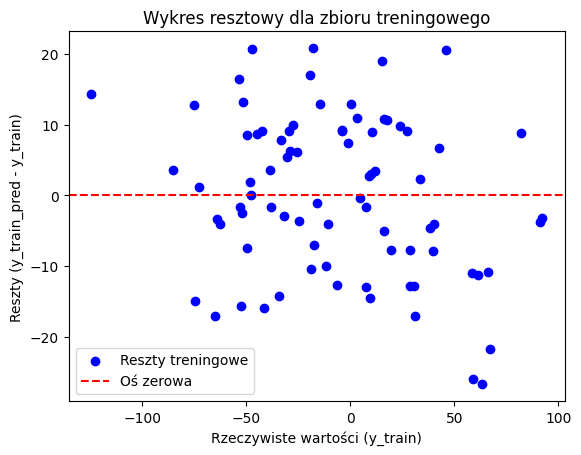

In [42]:
plt.scatter(y_train, residuals_train, color='blue', label='Reszty treningowe')
plt.axhline(y=0, color='red', linestyle='--', label='Oś zerowa')  
plt.title("Wykres resztowy dla zbioru treningowego")
plt.xlabel("Rzeczywiste wartości (y_train)")
plt.ylabel("Reszty (y_train_pred - y_train)")
plt.legend()
plt.show()

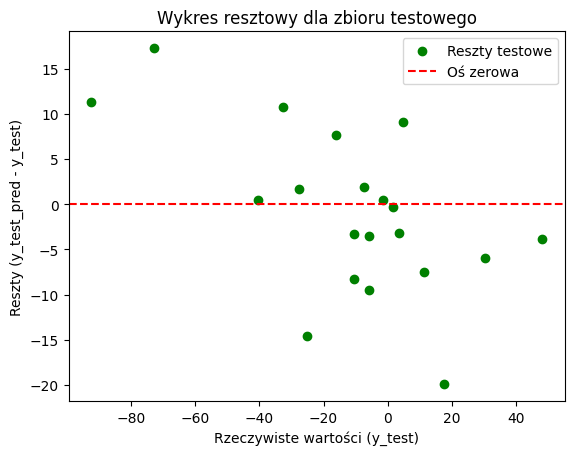

In [43]:
plt.scatter(y_test, residuals_test, color='green', label='Reszty testowe')
plt.axhline(y=0, color='red', linestyle='--', label='Oś zerowa')  
plt.title("Wykres resztowy dla zbioru testowego")
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Reszty (y_test_pred - y_test)")
plt.legend()
plt.show()

Wyznaczyć wartość MAE, MSE, RMSE, R2 dla zbioru treningowego i testowego. Jak można ocenić działanie modelu?

In [44]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Metryki dla zbioru treningowego:\nMAE: {mae_train:.3f}\nMSE: {mse_train:.3f}\nRMSE: {rmse_train:.3f}\nR2: {r2_train:.3f}\n")
print(f"Metryki dla zbioru testowego:\nMAE: {mae_test:.3f}\nMSE: {mse_test:.3f}\nRMSE: {rmse_test:.3f}\nR2: {r2_test:.3f}\n")

Metryki dla zbioru treningowego:
MAE: 9.362
MSE: 124.299
RMSE: 11.149
R2: 0.936

Metryki dla zbioru testowego:
MAE: 7.038
MSE: 80.133
RMSE: 8.952
R2: 0.918

